**KAYNAKÇALAR**
1. https://burcukoculu.medium.com/google-colabde-kaggle-veri-setini-nas%C4%B1l-%C3%A7ekip-%C3%BCzerinde-%C3%A7al%C4%B1%C5%9Fabiliriz-fd983434fcdd
2. https://yigitsener.medium.com/veri-biliminde-eksik-kay%C4%B1p-verilere-yakla%C5%9F%C4%B1m-stratejileri-ve-python-pandas-uygulamas%C4%B1-501fbf643795
3. https://medium.com/@daython3/mastering-the-art-of-feature-selection-python-techniques-for-visualizing-feature-importance-cacf406e6b71
4. https://medium.com/@haniszulaikha/out-with-the-outliers-fc39c2bcacd7



# **Kaggle'dan veri setini google colab ortamına çekme**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 3.22MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# **İlgili kütüphaneleri çağırma**


In [354]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LassoCV
from scipy.stats.mstats import winsorize

# **Veri setini okutma**

In [334]:
titanic_data = pd.read_csv('train.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **Keşifsel Veri Analizi(EDA)**

Veri seti hakkında genel bilgiler

In [308]:
def check_df(titanic_data):
    print("##################### Shape #####################")
    print(titanic_data.shape)
    print("\n##################### Columns #####################")
    print(titanic_data.columns)
    print("\n##################### Types #####################")
    print(titanic_data.dtypes)
    print("##################### Head #####################")
    print(titanic_data.head())
    print("##################### Tail #####################")
    print(titanic_data.tail())
    print("##################### NA #####################")
    print(titanic_data.isnull().sum())

In [309]:
check_df(titanic_data)

##################### Shape #####################
(891, 12)

##################### Columns #####################
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

##################### Types #####################
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
##################### Head #####################
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harr

1. Titanik veri seti, 891 satır ve 12 sütundan oluşmaktadır.
2. Sütunlar ve veri tipleri:
  * PassengerId : Yolcu ID (veri tipi - integer)
  * Survived : Hayatta kalma durumu (0 = Hayır, 1 = Evet) (veri tipi - integer)
  * Pclass : Yolcu sınıfı  (1 = 1st class, 2 = 2nd class, 3 = 3rd class) (veri tipi - integer)
  * Name : Yolcu isimleri  (veri tipi - object)
  * Sex : Yolcu cinsiyeti (veri tipi - object)
  * Age : Yolcu yaşı (veri tipi - float)
  * SibSp : Gemideki kardeş/eş sayısı (veri tipi - integer)
  * Parch : Gemideki ebeveyn/çocuk sayısı (veri tipi - integer)
  * Ticket : Bilet numarası (veri tipi - object)
  * Fare : Bilet ücreti (veri tipi - float)
  * Cabin : Kabin numarası (veri tipi - object)
  * Embarked : Biniş limanı  (C = Cherbourg, Q = Queenstown, S = Southampton) (veri tipi - object)
3. Eksik Gözlem:
  * 177 satırda Age değişkenine ait bilgi, 687 satırda Cabin değişkenine ait, 2 satırda Embarked değişkenine ait bilgi eksiktir.


# **Veri temizleme ve Ön işleme**

PassengerID değişkeni gereksiz bir değişkendir. Cabin değişkeninde ise çok fazla eksik gözlem olmasından dolayı ve Ticket ve Name değişkeni de kullanılmayacağından bu iki değişken veri setinden çıkartılır.

In [335]:
columns_to_drop = ['PassengerId', 'Ticket', 'Name', 'Cabin']

# Sütunları çıkarın
titanic_data = titanic_data.drop(columns=columns_to_drop)
print(titanic_data)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]


* Sex, Embarked değişkeninin veri tipini kategorik olarak değiştirme

In [336]:
columns_to_convert = ['Sex', 'Embarked']

# Veri tiplerini kategorik olarak değiştirme
titanic_data[columns_to_convert] = titanic_data[columns_to_convert].astype('category')
titanic_data.dtypes

Survived       int64
Pclass         int64
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
dtype: object

Age değişkeninde eksik gözlemlerin lineer regresyon kullanılarak doldurulması.
Bu yöntemde Age değişkeni bağımlı değişken, diğer değişkenlerde bağımsız değişkenler olarak alınır. Ve bu şekilde kayıp gözlemler doldurulur.

In [337]:
titanic_data['Age'] = titanic_data['Age'].interpolate(method='linear')
titanic_data.Age.isnull().sum()

0

Embarked değişkeninde kayıp gözlemleri mode yöntemi ile doldurma. //
Bu yöntemde kayıp gözlemler en çok tekrar eden değere göre doldurulur.

In [338]:
mode_value = titanic_data['Embarked'].mode()[0]
titanic_data['Embarked'].fillna(mode_value, inplace=True)
titanic_data.Embarked.isnull().sum()

0

Embarked değişkeninin değerlerinin yeniden isimlendirilmesi

In [339]:
print(titanic_data['Embarked'].unique())

['S', 'C', 'Q']
Categories (3, object): ['C', 'Q', 'S']


In [340]:
new_values = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
titanic_data['Embarked'] = titanic_data['Embarked'].map(new_values)
titanic_data['Embarked']

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: Embarked, Length: 891, dtype: category
Categories (3, object): ['Cherbourg', 'Queenstown', 'Southampton']

Pclass değişkeninin değerlerinin yeniden isimlendirilmesi

In [341]:
print(titanic_data['Pclass'].unique())

[3 1 2]


In [342]:
new_labels = {1: '1st class', 2: '2nd class', 3: '3rd class'}
titanic_data['Pclass'] = titanic_data['Pclass'].map(new_labels)
titanic_data['Pclass']

0      3rd class
1      1st class
2      3rd class
3      1st class
4      3rd class
         ...    
886    2nd class
887    1st class
888    3rd class
889    1st class
890    3rd class
Name: Pclass, Length: 891, dtype: object

Pclass değişkenini kategorik değişken yapma

In [343]:
titanic_data['Pclass'] = titanic_data['Pclass'].astype('category')

# **Veri setinde tanımlayıcı istatistikler**

In [277]:
titanic_data.describe()

,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.726061,0.523008,0.381594,32.204208
std,0.486592,13.902353,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,0.000000,0.000000,7.910400
50%,0.000000,28.500000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


* Age değişkeni incelendiğinde, 891 kişi içinde en küçük kişi 1 yaşından küçüktür, en büyük kişi ise 80 yaşındadır. 891 kişinin %25'i 21 yaşından küçüktür. %75'i 38 yaşından büyüktür. 891 kişinin yaş ortalaması 29.83'tür.
* Fare değişkeni incelendiğinde, 891 kişi içinde en düşük bilet ücreti 0&dollar;'dır, en yüksek bilet ücreti ise 512.33&dollar;'dır. 891 kişinin %25'inin bilet ücreti 7.91&dollar;'dan küçüktür. %75'inin bilet ücreti 31&dollar;'dan büyüktür. 891 kişiye ait toplam bilet ücretinin ortalaması 32.20&dollar;'dır.


Age değişkeninin boxplot(kutu grafiğinin çizilmesi)

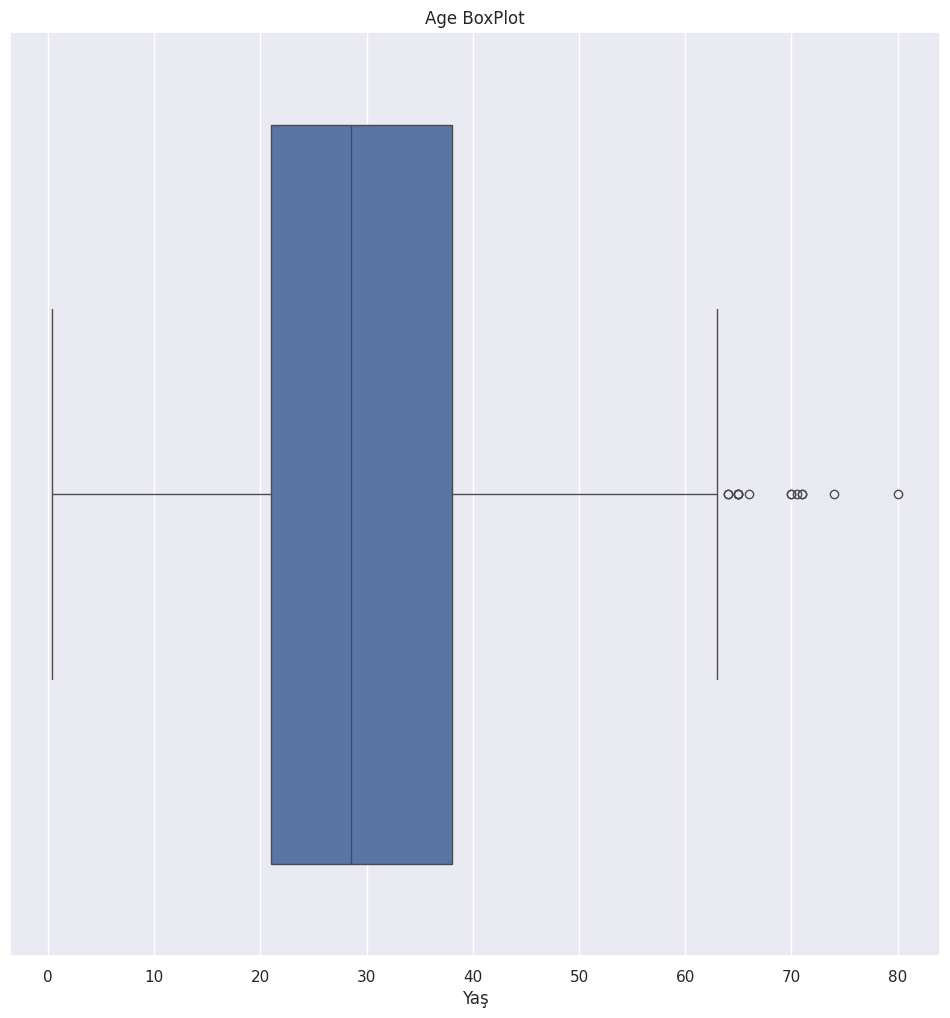

In [278]:
# Box plot
sns.boxplot(x=titanic_data['Age'])
plt.xlabel('Yaş')
plt.title('Age BoxPlot')
plt.show()

Kutu grafiğine göre, sağa çarpıklık gözlenmektedir. Age değişkeninde birden fazla aykırı değerler olduğu da gözlenmektedir.

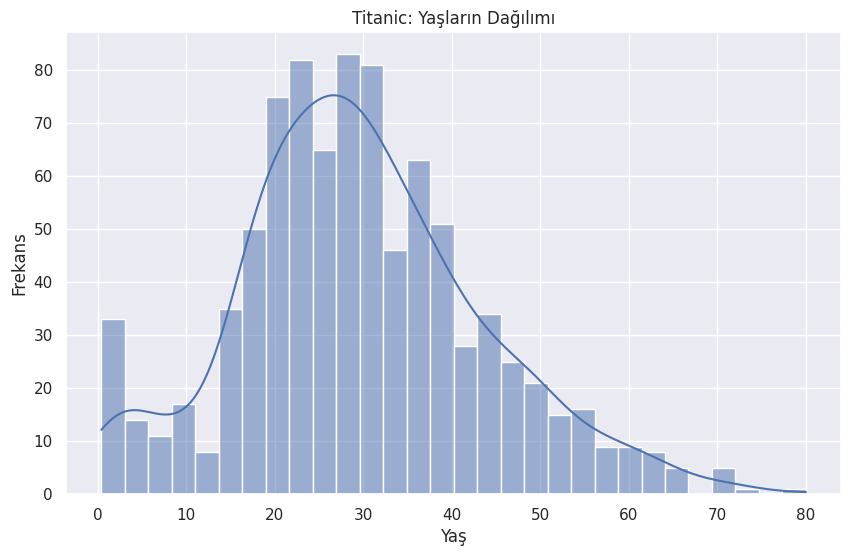

In [279]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_data, x='Age', bins=30, kde=True)
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.title('Titanic: Yaşların Dağılımı')
plt.show()

Fare değişkeninin boxplot(kutu grafiğinin çizilmesi)

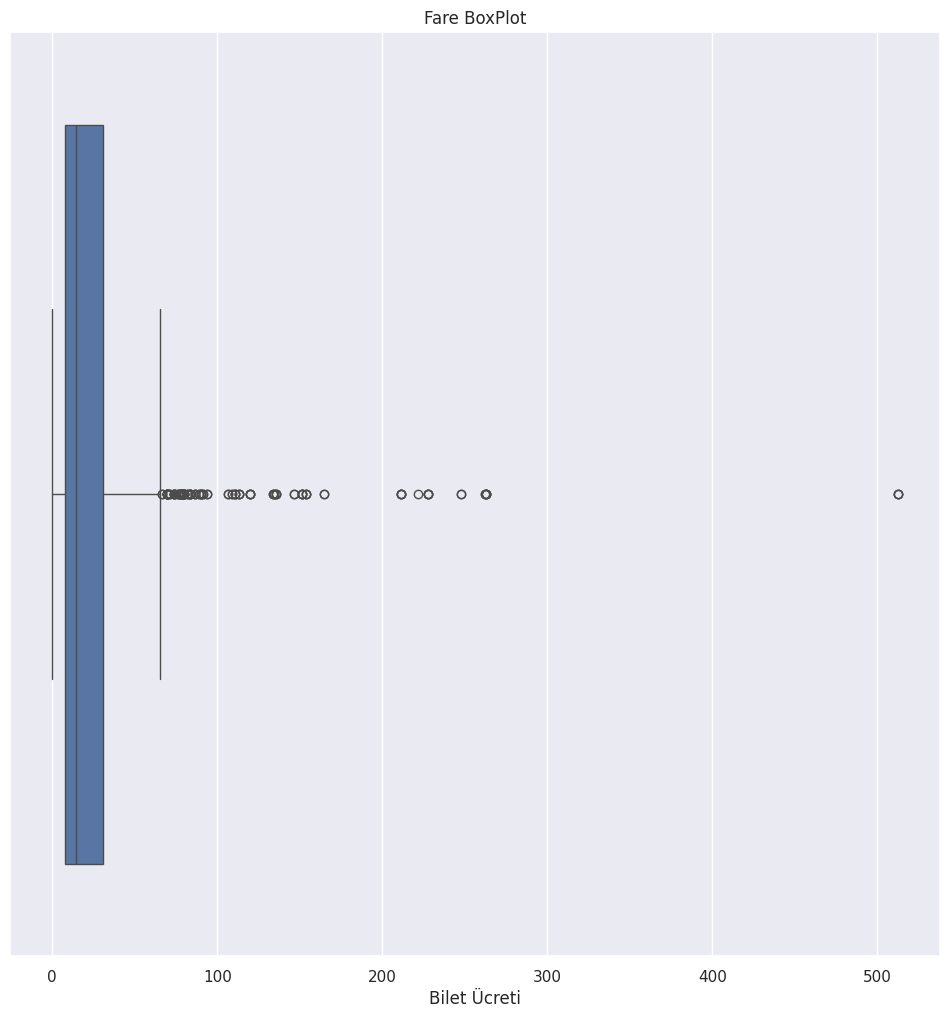

In [280]:
sns.boxplot(x=titanic_data['Fare'])
plt.xlabel('Bilet Ücreti')
plt.title('Fare BoxPlot')
plt.show()

Kutu grafiğine göre, sağa çarpıklık gözlenmektedir. Fare değişkeninde birden fazla aykırı değerler olduğu da gözlenmektedir.

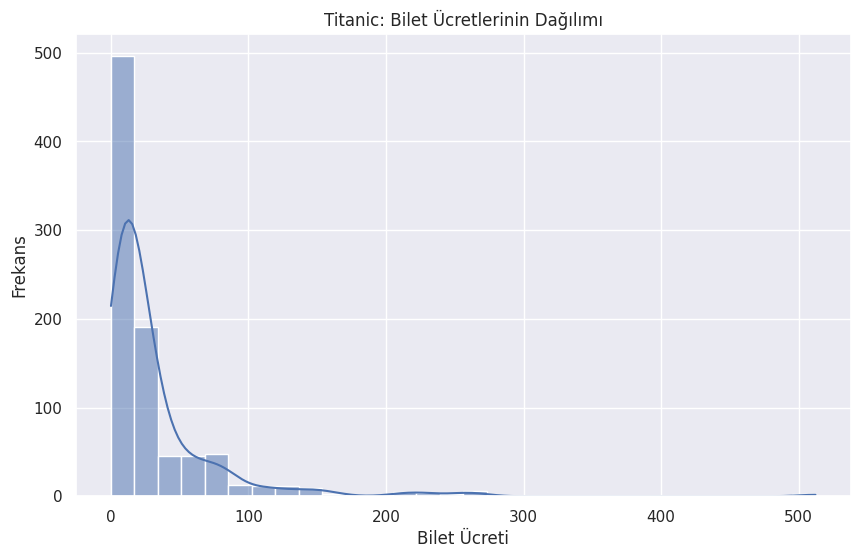

In [281]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_data, x='Fare', bins=30, kde=True)
plt.xlabel('Bilet Ücreti')
plt.ylabel('Frekans')
plt.title('Titanic: Bilet Ücretlerinin Dağılımı')
plt.show()

# **Görselleştirme**

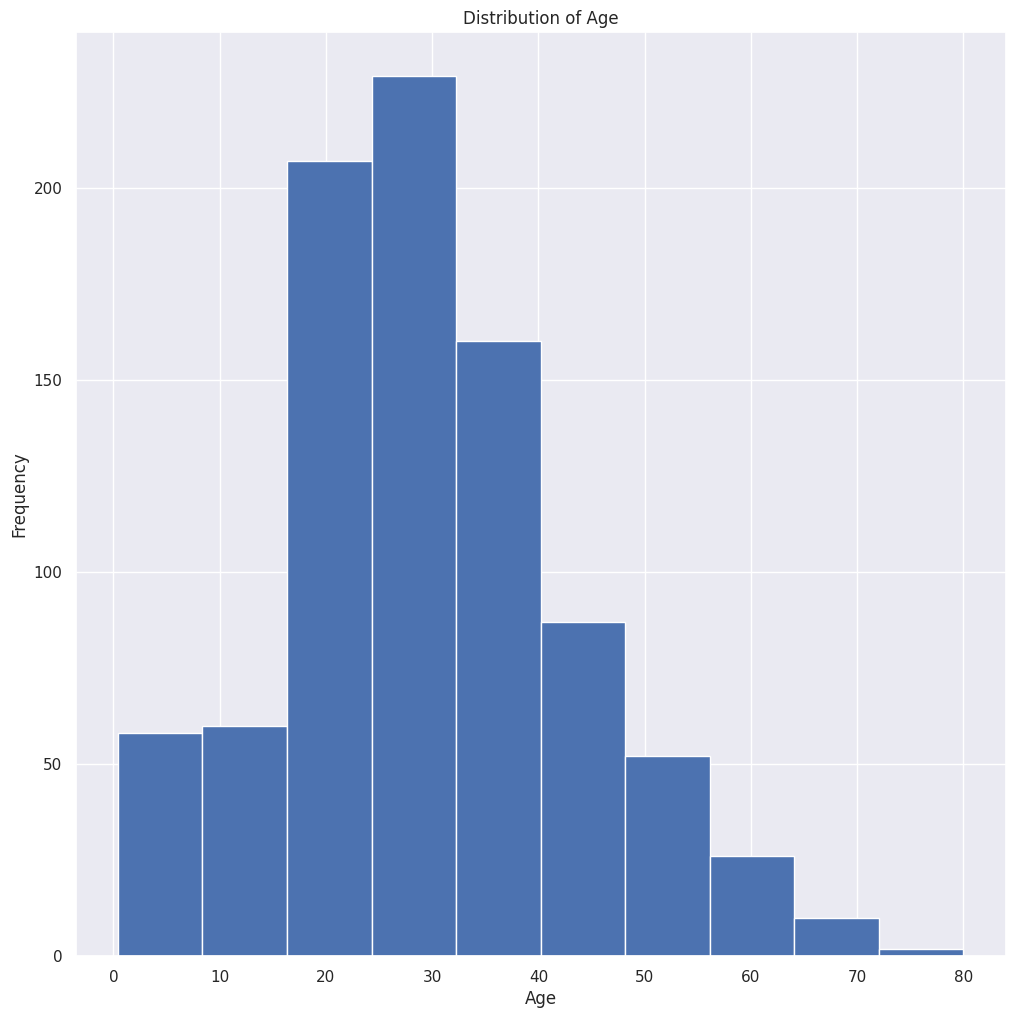

In [282]:
# Histogram
plt.hist(titanic_data['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

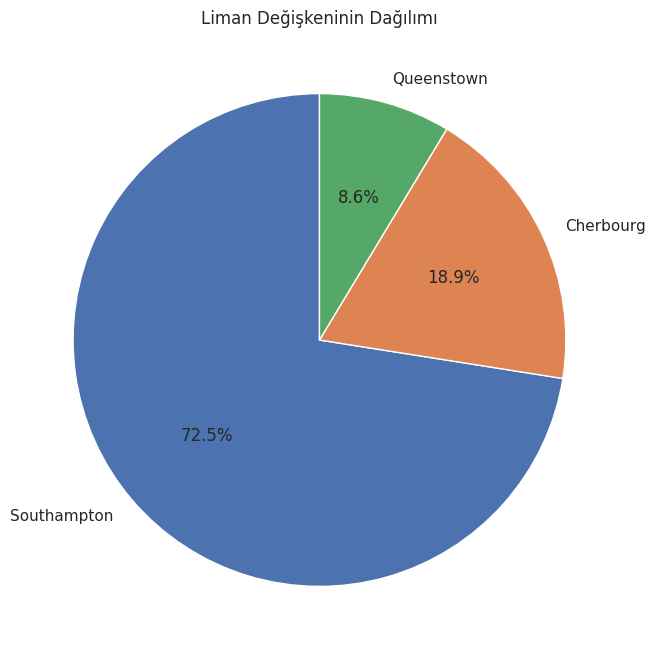

In [283]:
# Pie Graph
plt.figure(figsize=(8, 8))
titanic_data['Embarked'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Liman Değişkeninin Dağılımı')
plt.ylabel('')
plt.show()

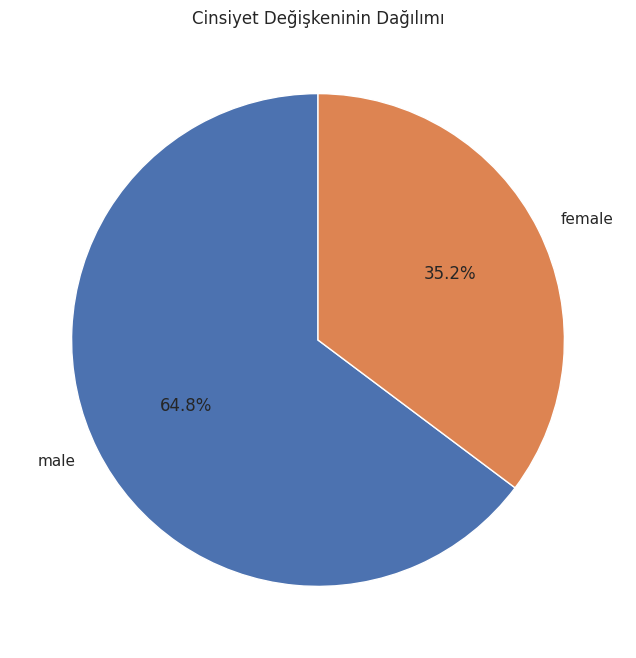

In [284]:
# Pie Graph
plt.figure(figsize=(8, 8))
titanic_data['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Cinsiyet Değişkeninin Dağılımı')
plt.ylabel('')
plt.show()

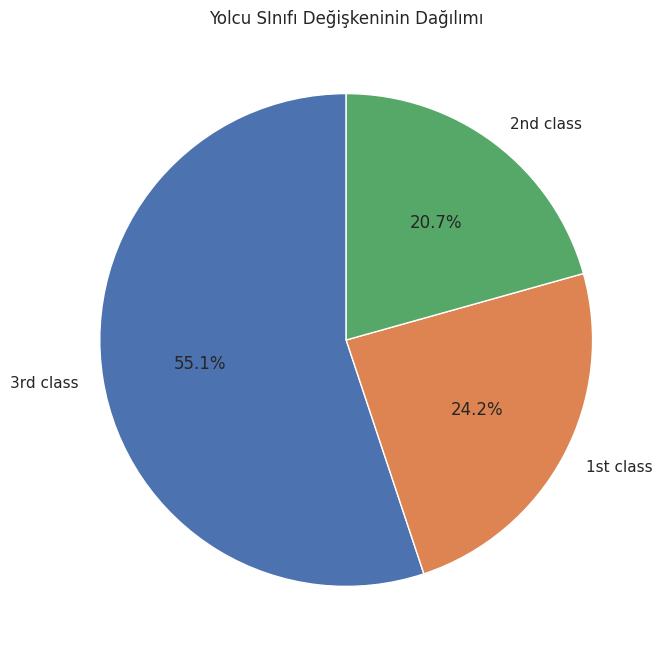

In [285]:
# Pie Graph
plt.figure(figsize=(8, 8))
titanic_data['Pclass'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Yolcu SInıfı Değişkeninin Dağılımı')
plt.ylabel('')
plt.show()

# **Değişkenler arası ilişki**

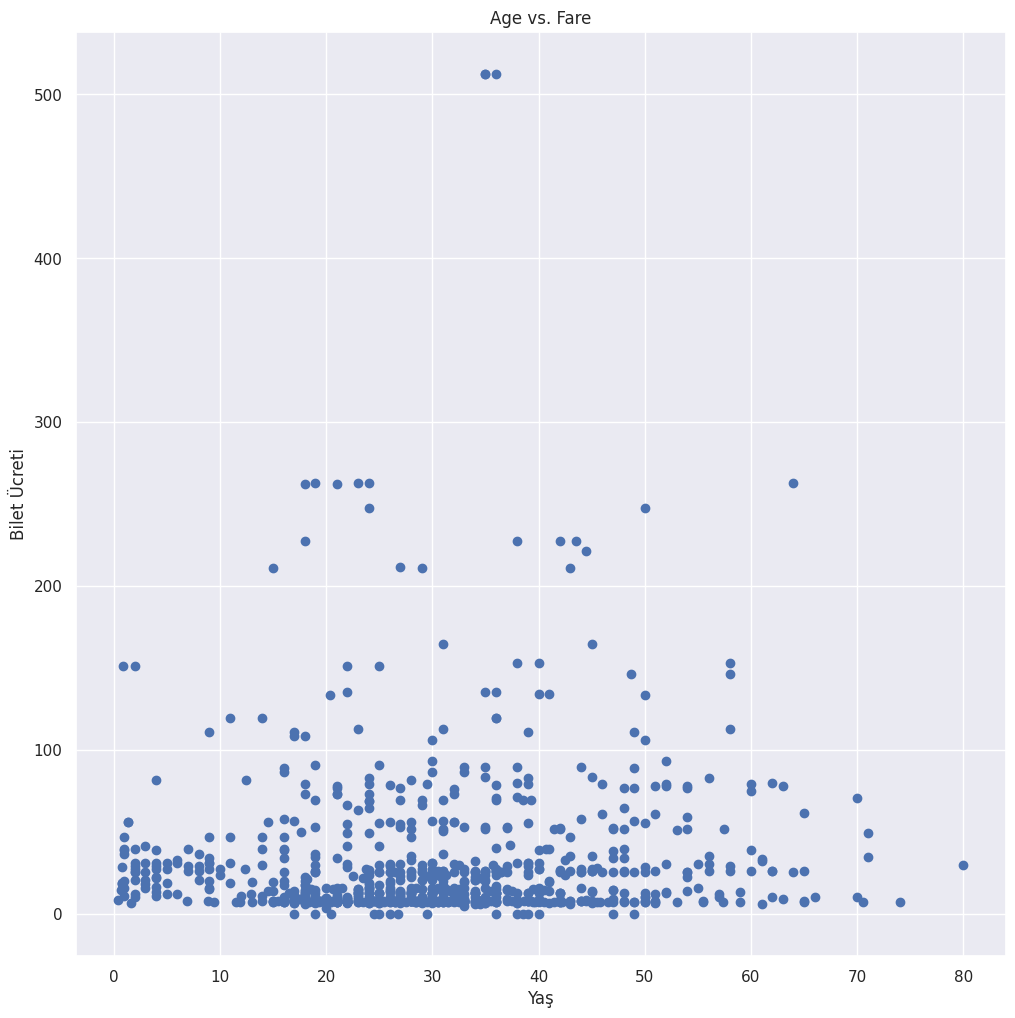

In [286]:
# Scatter plot
plt.scatter(titanic_data['Age'], titanic_data['Fare'])
plt.xlabel('Yaş')
plt.ylabel('Bilet Ücreti')
plt.title('Age vs. Fare')
plt.show()

In [287]:
correlation = titanic_data[['Age', 'Fare']].corr()
print(correlation)

           Age      Fare
Age   1.000000  0.087119
Fare  0.087119  1.000000


Saçılım grafiğine göre Age ve Fare değişkenleri arasında doğrusal bir ilişki olmadığı söylenebilir.
Korelasyon değeri, 0.087 olarak bulunmuştur. Bu da yaş ile bilet ücretleri arasında oldukça zayıf bir ilişki olduğunu gösterir.

# **Feature Engineering**

In [344]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3rd class,male,22.0,1,0,7.2500,Southampton
1,1,1st class,female,38.0,1,0,71.2833,Cherbourg
2,1,3rd class,female,26.0,0,0,7.9250,Southampton
3,1,1st class,female,35.0,1,0,53.1000,Southampton
4,0,3rd class,male,35.0,0,0,8.0500,Southampton
...,...,...,...,...,...,...,...,...
886,0,2nd class,male,27.0,0,0,13.0000,Southampton
887,1,1st class,female,19.0,0,0,30.0000,Southampton
888,0,3rd class,female,22.5,1,2,23.4500,Southampton
889,1,1st class,male,26.0,0,0,30.0000,Cherbourg


Embarked değişkenine label encoding uygulayarak sayısal olarak ifade etme

In [345]:
# LabelEncoder nesnesini oluşturma
label_encoder = LabelEncoder()

# 'Embarked' değişkenine label encoding uygulama
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

print(titanic_data['Embarked'].head())

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64


Pclass değişkenine label encoding uygulayarak sayısal olarak ifade etme

In [346]:
# 'Pclass' değişkenine label encoding uygulama
titanic_data['Pclass'] = label_encoder.fit_transform(titanic_data['Pclass'])

print(titanic_data['Pclass'].head())

0    2
1    0
2    2
3    0
4    2
Name: Pclass, dtype: int64


Sex değişkenine label encoding uygulayarak sayısal olarak ifade etme

In [347]:
# 'Sex' değişkenine label encoding uygulama
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])

print(titanic_data['Sex'].head())

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64


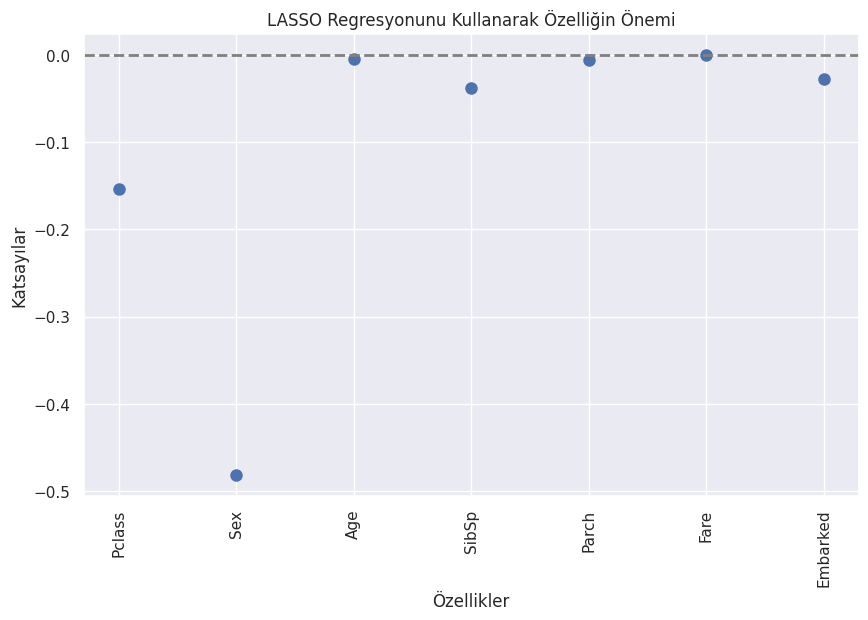

In [348]:
# Hedef değişkeni
target = titanic_data['Survived']

# Veri setinden hedef değişkenin çıkarılması
X = titanic_data.drop(columns=['Survived'])

# LASSO regresyon modeli
lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X, target)

# Katsayılar
plt.figure(figsize=(10, 6))
plt.plot(range(len(X.columns)), lasso.coef_, marker='o', markersize=8, linestyle='None')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=2)
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.ylabel('Katsayılar')
plt.xlabel('Özellikler')
plt.title('LASSO Regresyonunu Kullanarak Özelliğin Önemi')
plt.show()

Age, Parch ve Fare değişkenleri, hayatta kalma durumunu etkilememektedir.

Aykrı değer incelemesi

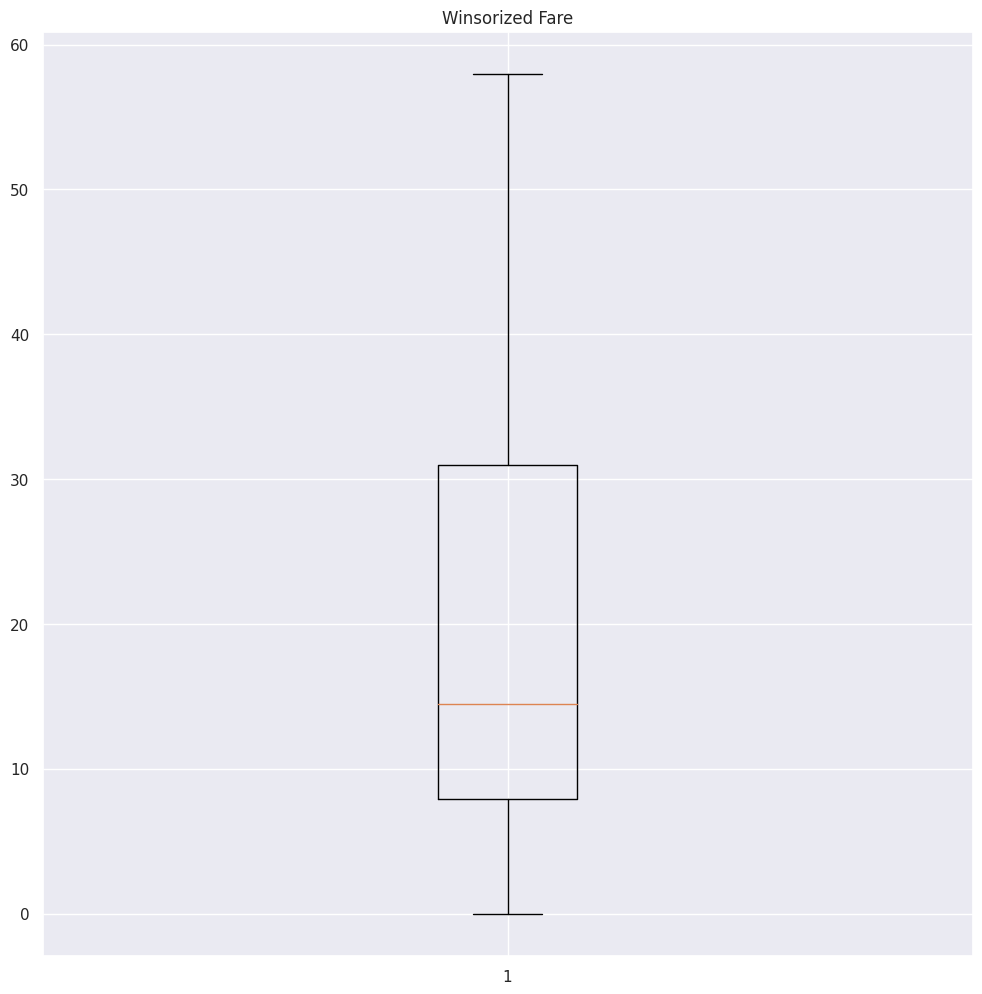

In [379]:
# Winsorize işlemini gerçekleştirme
WinsorizedFare = winsorize(titanic_data['Fare'], (0.01, 0.14))

plt.boxplot(WinsorizedFare)
plt.title('Winsorized Fare')
plt.show()

Bilet ücretlerinin alt %1'lik kısmı en küçük %1'lik değere, üst %14'lük kısmı ise en büyük %14'lük değere eşitlenir. Verinin uç değerleri sınırlanarak aykırı değer etkisi azaltılır.

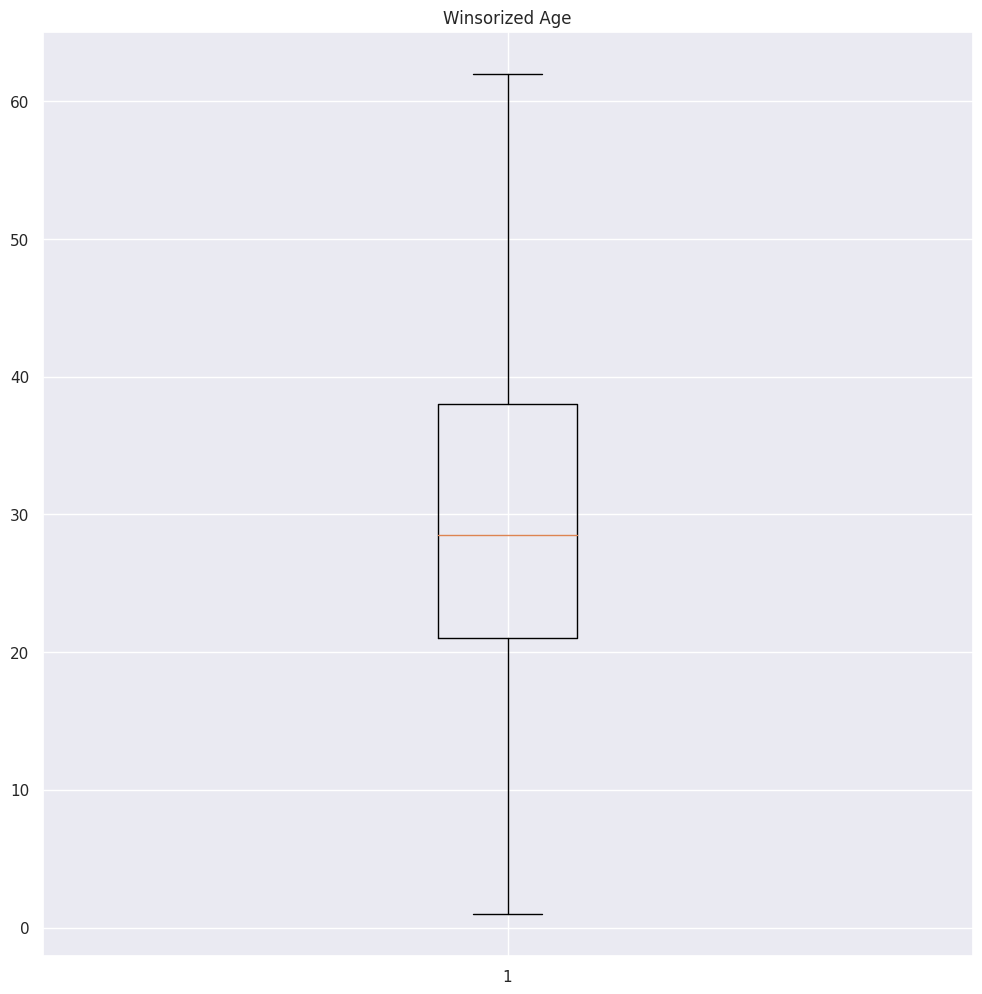

In [377]:
# Winsorize işlemini gerçekleştirme
WinsorizedAge = winsorize(titanic_data['Age'], (0.01, 0.02))

plt.boxplot(WinsorizedAge)
plt.title('Winsorized Age')
plt.show()

Yaşın alt %1'lik kısmı en küçük %1'lik değere, üst %2'lik kısmı ise en büyük %2'lik değere eşitlenir. Verinin uç değerleri sınırlanarak aykırı değer etkisi azaltılır.